# <span style="color:red"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue"> Esercitazione 2 </span>

In questa esercitazione andremo a calcolare un integrale attraverso metodi Montecarlo, sfruttando un campionamento da diverse distribuzioni. Simuleremo inoltre un *Random Walk* (***RW***) in un reticolo cubico e nel continuo.

### Esercizio 02.1
Vogliamo calcolare il seguente integrale monodimensionale:

$$I = \int_0^1{f(x) \,dx } = 1 \: , \qquad f(x) = \frac{\pi}{2}\cos\left(\frac{\pi}{2}x\right)$$

attraverso metodi Montecarlo: la tecnica che adoperiamo è il metodo della media. Questa tecnica richiede il campionamento di una variabile aleatoria da una distribuzione di probabilità; inizialmente usiamo una distribuzione uniforme in $[0,1]$.

Possiamo anche sfruttare l'*importance sampling*, che richiede il campionamento da una diversa distribuzione di probabilità scelta opportunamente in base alla funzione da integrare.

La distribuzione (normalizzata) da cui scegliamo di campionare è la seguente:

$$p(x)=\dfrac{3}{2}\sqrt{1-x} \: .$$

Di seguito sono rappresentate la funzione $f(x)$ da integrare e la $p(x)$ scelta.

In [1]:
# Moduli
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

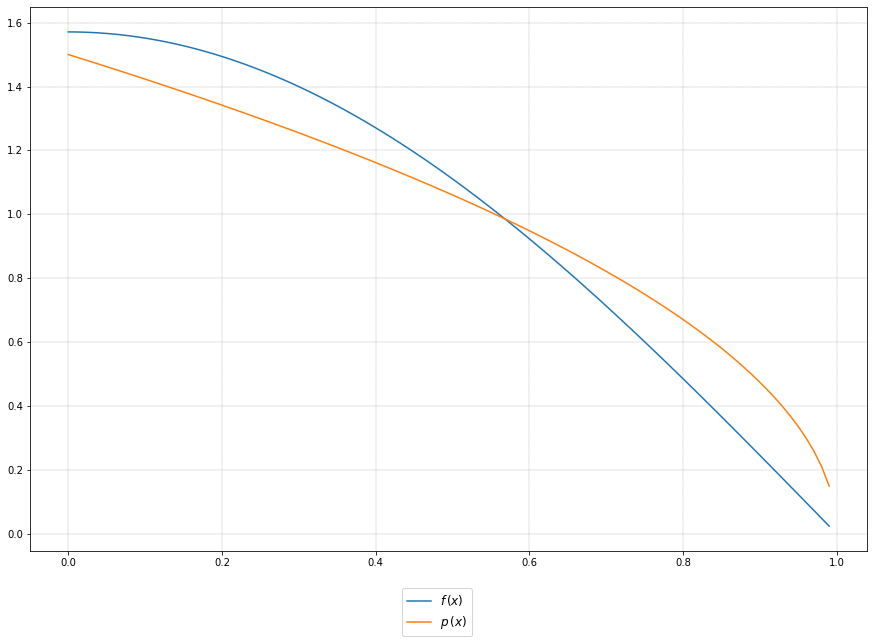

In [31]:
def f(x):
    return math.pi/2.*np.cos(math.pi/2.*x)

def g(x):
    return 3./2.* np.sqrt(1-x)

x = np.arange(0,1, 0.01)

y_f = f(x)
y_g = g(x)

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax0.plot(x,y_f, label=r"$f\,(x)$")
ax0.plot(x,y_g, label=r"$p\,(x)$")
ax0.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

fig.legend(loc="lower center",ncol=1, fontsize='large')

plt.show()

L'integrale diventa quindi:

$$ \int_0^1 \frac{\pi\cos\left(\frac{\pi}{2}x\right)}{3\sqrt{1-x}} dx $$

che andremo a calcolare campionando da $p(x)$.

I dati ottenuti sono elaborati con il metodo a blocchi per ottenre una stima del valore dell'integrale con il realativo errore statistico. Si sono prodotti $N=10^4$ stime dell'integrale, divise in $M=100$ blocchi. Ogni stima è calcolata con il metodo della media usando $10^3$ punti. Di seguito riportiamo i risultati ottenuti.

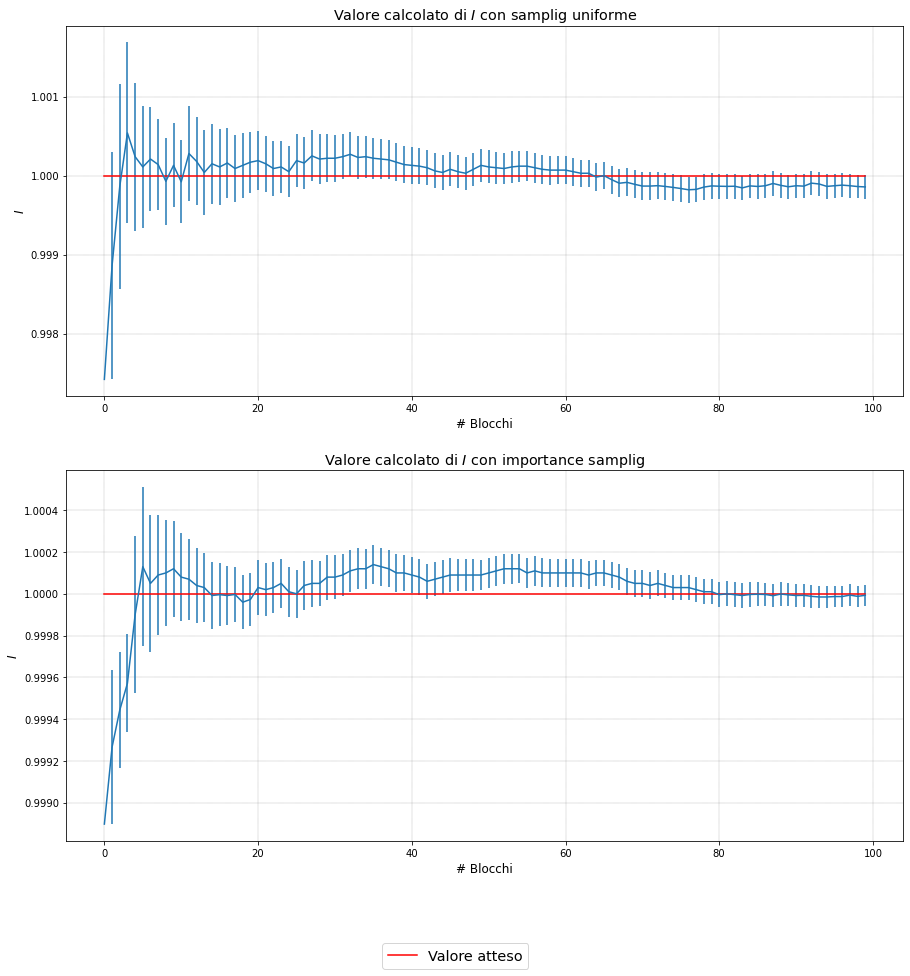

In [34]:
fig1, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

n_blocks = 100

#Sampling Uniforme

x = np.arange(n_blocks)
mean_prog = np.zeros(n_blocks)
err_prog = np.zeros(n_blocks)

file_mean = open("02.1/Data/integral_uniform.out")
file_err = open("02.1/Data/integral_uniform_err.out")

for i in range(n_blocks):
    mean_prog[i] = float(file_mean.readline())
    err_prog[i] = float(file_err.readline())
    
file_mean.close()
file_err.close()

expected = [1 for i in x]

ax0.errorbar(x,mean_prog,yerr=err_prog)
ax0.set_xlabel('# Blocchi', fontsize='large')
ax0.set_ylabel('$I$', fontsize='large')
ax0.set_title('Valore calcolato di $I$ con samplig uniforme', fontsize='x-large')
ax0.plot(x,expected, 'r', label='Valore atteso')
ax0.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

################################################

#Importance Sampling

x = np.arange(n_blocks)
mean_prog = np.zeros(n_blocks)
err_prog = np.zeros(n_blocks)

file_mean = open("02.1/Data/integral_sampling.out")
file_err = open("02.1/Data/integral_sampling_err.out")

for i in range(n_blocks):
    mean_prog[i] = float(file_mean.readline())
    err_prog[i] = float(file_err.readline())
    
file_mean.close()
file_err.close()

ax1.errorbar(x,mean_prog,yerr=err_prog)
ax1.set_xlabel('# Blocchi', fontsize='large')
ax1.set_ylabel('$I$', fontsize='large')
ax1.set_title('Valore calcolato di $I$ con importance samplig', fontsize='x-large')
ax1.plot(x,expected, 'r')
ax1.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

fig1.legend(loc='lower center',ncol=1, fontsize='x-large')

plt.show()

Possiamo vedere come in entrambi i casi il valore stimato coverge entro una deviazione standard al valore esatto. In particolare, la covergenza è milgiore nel caso di *Importance Sampling*: un risulato che ci aspettavamo, in quanto la distribuzione di probabilità $p(x)$ ha un profilo più simile alla funzione integranda che non la distribuzione uniforme.

Questo fatto si riscontra anche nell'andamento dell'errore ne due casi, riportato di seguito, in cui quello associato all'*Importance Sampling* risulta più piccolo che nel caso della distribuzione uniforme.

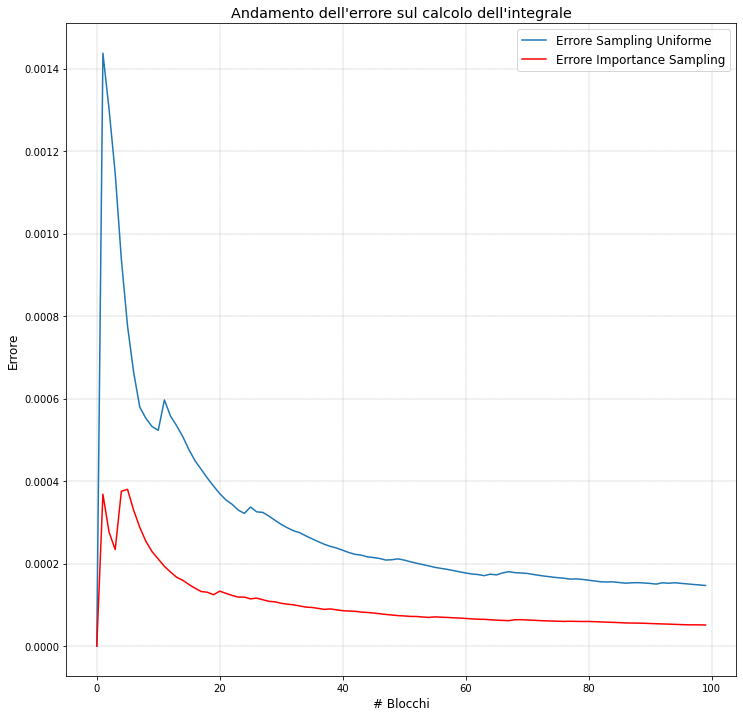

In [35]:
#Andamento errore

fig2, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

fileA = open("02.1/Data/integral_uniform_err.out")
fileB = open("02.1/Data/integral_sampling_err.out")

x = np.arange(n_blocks)
A = np.zeros(n_blocks)
B = np.zeros(n_blocks)

for i in range(n_blocks):
    A[i] = float(fileA.readline())
    B[i] = float(fileB.readline())
    
fileA.close()
fileB.close()

ax0.plot(x,A, label='Errore Sampling Uniforme')
ax0.plot(x,B,'r', label='Errore Importance Sampling')
ax0.set_xlabel('# Blocchi', fontsize='large')
ax0.set_ylabel('Errore', fontsize='large')
ax0.set_title("Andamento dell'errore sul calcolo dell'integrale", fontsize='x-large')
ax0.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

plt.legend(loc='upper right',ncol=1, fontsize='large')

plt.show()

### Esercizio 02.2
Simuliamo un cammino casuale (***RW***) nello spazio 3D. Effettueremo la simulazione in due modalità distinte:

- ***RW*** su un reticolo cubico, in cui il camminatore si muove ad ongi passo avanti o indietro lungo una delle tre direzioni principali $x$, $y$, $z$.
- ***RW*** nel continuo, in cui il camminatore si muove nello spazio in una direzione casuale.

Nel primo caso il reticolo ha lato della cella elementare $a=1$, mentre nel secondo caso il camminatore si muove con raggio fisso $r=1$. 

Andiamo a eseguire $10^4$ ripetizione dei **RW***; ciascuno di essi è composto da $100$ passi. Di seguito riportiamo i risultati, rappresentati da: $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ ; facciamoa nche un fit ai valori calcolati con la curva $f(N)=k\sqrt{N}$ .

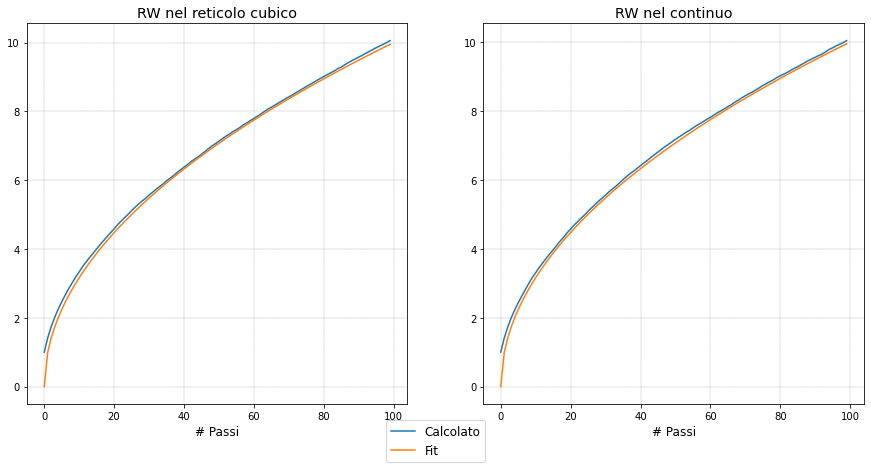

In [36]:
fig3, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

n_step = 100

def f(x):
    return np.sqrt(x)

k = 1

#RW nel reticolo cubico

x = np.arange(n_step)
mean_prog = np.zeros(n_step)
err_prog = np.zeros(n_step)

file_mean = open("02.2/Data/cubic_RW.out")
file_err = open("02.2/Data/cubic_RW_err.out")

for i in range(n_step):
    mean_prog[i] = float(file_mean.readline())
    err_prog[i] = float(file_err.readline())
    
file_mean.close()
file_err.close()


#Probelmi con errore(?)
#ax0.errorbar(x,mean_prog,yerr=err_prog)
ax0.plot(x,mean_prog, label="Calcolato")
ax0.plot(x,k*f(x),label="Fit")
ax0.set_xlabel('# Passi', fontsize='large')
ax0.set_ylabel('', fontsize='large')
ax0.set_title('RW nel reticolo cubico', fontsize='x-large')
ax0.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

####################################################
#RW nel continuo

x = np.arange(n_step)
mean_prog = np.zeros(n_step)
err_prog = np.zeros(n_step)

file_mean = open("02.2/Data/continuum_RW.out")
file_err = open("02.2/Data/continuum_RW_err.out")

for i in range(n_step):
    mean_prog[i] = float(file_mean.readline())
    err_prog[i] = float(file_err.readline())
    
file_mean.close()
file_err.close()


ax1.plot(x,mean_prog)
#ax1.errorbar(x,mean_prog,yerr=err_prog)
ax1.plot(x,k*f(x))
ax1.set_xlabel('# Passi', fontsize='large')
ax1.set_ylabel('', fontsize='large')
ax1.set_title('RW nel continuo', fontsize='x-large')
ax1.grid(True, linestyle="--", linewidth=0.2, color='.25', zorder=-10)

fig3.legend(loc="lower center",fontsize="large")
plt.show()

Vediamo che il fitting in entrambi i casi è soddisfacente, per un valore di $k=1$ .